# El problema de Keppler

Para dos cuerpos de masa $m_1$ y $m_2$, podemos generar las ecuaciones de movimiento perturbadas:

$$ m_1 = \delta + m_2 $$

$$ E = \frac{1}{2} m_1 \left( x'² + y'² \right) + \frac{1}{2} \delta \left( \frac{dx}{dt} \right) ² - \frac{Gm_1²}{\sqrt{ x² + y² }} - \frac{G \delta m_1²}{\sqrt{ x² + y² }}$$

$$
L = \frac{\partial E}{\partial \theta '} = r² \theta ' = cte
$$

$$
E = \frac{1}{2} \left( x'² + y'² \right) + \frac{\delta}{2m_1} x'² - \frac{1}{\sqrt{ x² + y² }} (1 + \frac{\delta}{m_1})
$$

Con el cambio de variable $ \alpha = \frac{\delta}{m_1}$ :

$$
E = \frac{1}{2} \left( p_x ² + p_y ² \right) + \frac{\alpha}{2} p_x ² - \frac{1}{\sqrt{ x² + y² }} (1 + \alpha)
$$

$$
\frac{\partial p_x}{\partial t} = - \frac{\partial E}{\partial x} = - \frac{x}{\sqrt{x² + y²}  ³}  (1 + \alpha)
$$

$$
\frac{\partial p_x}{\partial t} = - \frac{\partial E}{\partial x} = - \frac{y}{\sqrt{x² + y²}  ³}  (1 + \alpha)
$$

$$
\frac{\partial x}{\partial t} = \frac{\partial E}{\partial p_x} = p_x (1 + \alpha)
$$

$$
\frac{\partial y}{\partial t} = \frac{\partial E}{\partial p_y} = p_y
$$

In [1]:
from pylab import *
%matplotlib inline

/home/maunio/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [7]:
def ec_mov(x_p, t, a=0):
    # x_p represetna x, y , px , py
    r3_2 = (x_p[0]**2 + x_p[1]**2)**(1.5)
    desv = 1. + a
    dx = x_p[2] * (desv) 
    dy = x_p[3]
    dpx = -(x_p[0]*(desv))/r3_2
    dpy = -(x_p[1]*(desv))/r3_2
    return array([dx, dy, dpx, dpy])
    

In [8]:
def rk4(ec,p_ini,x,args=0,h=0.01):
    if (x[1]-x[0]) <= 5.*h:
        h = (x[1]-x[0])/10
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempos,sol

<function matplotlib.pyplot.show>

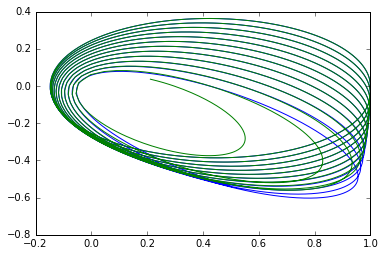

In [9]:
t, sol = rk4(ec_mov, [1, 0, 0, 0.5], [0, 30], 0.05, 0.001)
plot(sol[:,0], sol[:,1])
t, sol = rk4(ec_mov, [1, 0, 0, 0.5], [0, 30], 0.05, 0.01)
plot(sol[:,0], sol[:,1])
show()

In [10]:
def Energia(x_p, a):
    x, y, px, py = x_p[:,0], x_p[:,1], x_p[:,2], x_p[:, 3]
    E = 0.5*(px*px*(1.+a) + py*py) - ((1. + a)/sqrt(x**2 + y**2))
    return E

In [31]:
def L_z(x_p, a=0):
    x, y, px, py = x_p[:,0], x_p[:,1], x_p[:,2], x_p[:,3]
    L = x*py - y*px
    return L

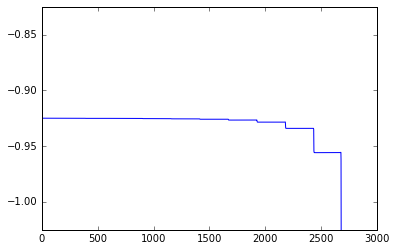

In [11]:
E = Energia(sol, 0.05)
ylim([E[0]-0.1, E[0]+0.1])
plot(E)

In [12]:
from scipy.integrate import odeint

<function matplotlib.pyplot.show>

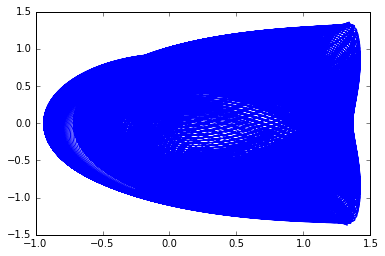

In [22]:
t = linspace(0, 2*pi*490,500000)
sol = odeint(ec_mov, [1, 0, 0, 1.0], t, args=(0.05,), rtol=1e-15)
plot(sol[:,0], sol[:,1])
show

/home/maunio/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in divide
  app.launch_new_instance()


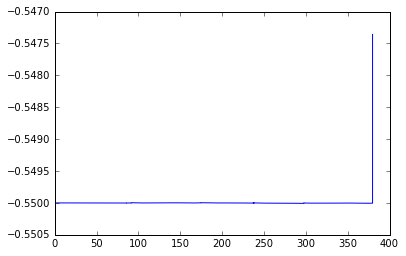

In [23]:
E = Energia(sol, 0.05)
plot(t/(2*pi), E)
show()

## Sistemas con la misma energía pero diferentes posiciones iniciales

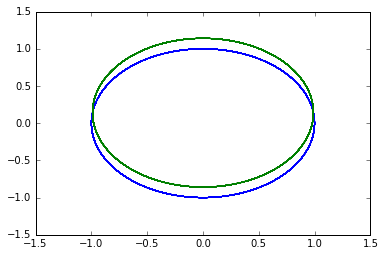

In [36]:
t = linspace(0, 2*pi*50,5000)
alpha = 0.0
sol = odeint(ec_mov, [1, 0, 0, 1.0], t, args=(alpha,), rtol=1e-15)
sol2 = odeint(ec_mov, [0.99, sqrt(1-0.99**2), 0, 1.0], t, args=(alpha,), rtol=1e-15)

plot(sol[:,0], sol[:,1])
plot(sol2[:,0], sol2[:,1])

show()

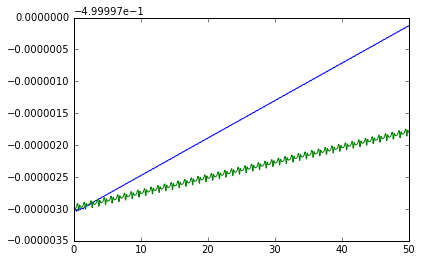

In [37]:
E1 = Energia(sol, alpha)
E2 = Energia(sol2, alpha)
plot(t/(2*pi), E1)
plot(t/(2*pi), E2)
show()

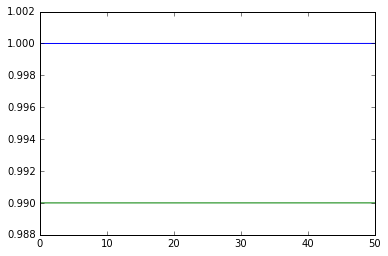

In [38]:
L1 = L_z(sol, alpha)
L2 = L_z(sol2, alpha)
plot(t/(2*pi), L1)
plot(t/(2*pi), L2)
show()